<a href="https://colab.research.google.com/github/HiroshiATakano/QC_Kentei/blob/main/Level1_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis multivariante

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os

path = os.getcwd()

try:
  os.chdir(path + '/drive/My Drive/QC_Kentei')
except:
  pass

os.getcwd()

'/content/drive/My Drive/QC_Kentei'

In [ ]:
!pip install japanize-matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

import polars as pl

import gspread
from google.colab import auth
auth.authenticate_user()

from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

## 15.2

10人の生徒に、国語、英語、数学、理科の学力テストを行い表15.2の結果が得られた。この成績の特徴を分析するため、このデータに対して主成分分析をおこなう。

Se realizó una prueba de habilidades en Lengua, inglés, matemáticas, y ciencias a 10 estudiantes, y se obtuvo el resultado en la tabla 15.2. Para analizar las características de estos resultados, se llevará a cabo un análisis de componentes principales sobre estos datos.

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1Ma7ehT4TAnkUwJjspP-C3mwJA1hYmbJr8B9GJSFI0lU/edit?usp=sharing"
ss = gc.open_by_url(url)

# Obtener los datos (como lista)
st = ss.worksheet("Sheet1")
list_of_lists = st.get_all_values()

df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)

df.set_index("Alu", inplace=True)
df = df.apply(pd.to_numeric)
df2 = df.copy()

# 各列の平均と標準偏差を計算し最終行に追加
df2.loc["mean"] = np.round(df2.mean(),1)
df2.loc["std"] = np.round(df2.std(),2)

df2.to_excel("Data_1/15_1.xlsx",index=False)
print("Tabla 15.1 Datos (puntajes de 100 puntos en cada materia)")
print(df2)


Tabla 15.1 Datos (puntajes de 100 puntos en cada materia)
0      Leng   Ing    Mat   Cien
Alu                            
1     48.00  38.0  57.00  60.00
2     53.00  43.0  59.00  64.00
3     62.00  68.0  63.00  83.00
4     77.00  85.0  61.00  59.00
5     65.00  74.0  54.00  51.00
6     47.00  48.0  51.00  59.00
7     66.00  66.0  47.00  61.00
8     35.00  39.0  52.00  58.00
9     66.00  67.0  47.00  58.00
10    56.00  41.0  48.00  48.00
mean  57.50  56.9  53.90  60.10
std   11.53  16.1   5.58   8.84


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Ejecución del análisis de componentes principales（PCA）
pca = PCA()
pca.fit(scaled_data)

# Valores propios (varianzas) de cada componete principal
# Vectores propios
eigenvalues = pca.explained_variance_  # Vectores propios
explained_variance_ratio = pca.explained_variance_ratio_  # Tasa de contribución
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)  # Tasa de contribución acumulada
eigenvectors = pca.components_.T  # Vectores propios

# Organizar los resultados en un DAtaFrame
results = pd.DataFrame({
    'Tasa de contribución': eigenvalues,
    'Tasa de contribución acumulada': cumulative_variance_ratio
}, index=[f'PC{i+1}' for i in range(len(eigenvalues))])

# Agregar los vectores propios
eigenvectors_df = pd.DataFrame(eigenvectors, columns=[f'PC{i+1}' for i in range(len(eigenvalues))], index=df.columns)

df2 = pd.merge(results, eigenvectors_df.T, left_index=True, right_index=True)
df2 = df2.round(3)

df2.to_excel("Data_1/15_2.xlsx")

#
print("Tabla 15.2 Resultados del análisis")
df2


Tabla 15.2 Resultados del análisis


,Tasa de contribución,Tasa de contribución acumulada,Leng,Ing,Mat,Cien
PC1,2.315,0.521,0.576,0.611,0.406,0.362
PC2,1.595,0.880,-0.424,-0.343,0.568,0.616
PC3,0.419,0.974,0.012,-0.075,0.716,-0.694
PC4,0.116,1.000,-0.699,0.710,0.002,-0.087


第一主成分と第二主成分に集約して、主成分得点と因子負荷量の散布図を作成する。

Agrupar en el primer y segundo componente principal, y crear un diagrama de dispersióon de las puntuaciones de los componetes principales y las cargas factoriales.

Resultados del análisis de componentes principalse:
Porcentaje de varianza explicada: [0.52076433 0.35892575]

Cargas factoriales:
           PC1       PC2
0                       
Leng  0.876211 -0.535480
Ing   0.928885 -0.433048
Mat   0.617266  0.718009
Cien  0.550379  0.778086




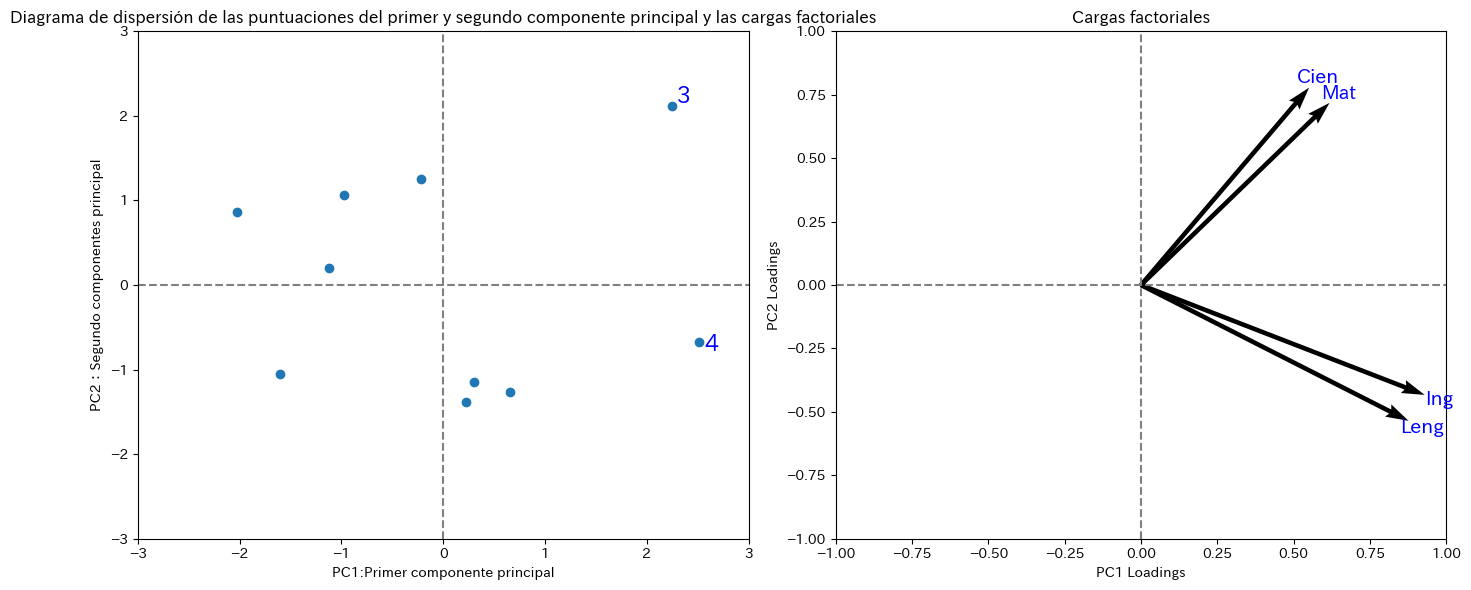

In [ ]:
# Ejecución del análisis de componentes principales (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Puntuaciones de los componentes principales
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df.to_excel('Data_1/pc_df.xlsx', index=False)

# Cargas factoriales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(data=loadings, columns=['PC1', 'PC2'], index=df.columns)
loading_df.to_excel('Data1/loading_df.xlsx')

#
print("Resultados del análisis de componentes principalse:")
print("Porcentaje de varianza explicada:", pca.explained_variance_ratio_)
print("\nCargas factoriales:")
print(loading_df)
print("\n")

# Creación del diagrama de dispersión
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Obtener el número del estudiantes con los valores máximos del primer y
# segundo componentes principal y agregarlo al gráfico
a = pc_df['PC1'].idxmax()
b = pc_df['PC2'].idxmax()

# Diagrama de dispersión de las puntuaciones del primer y segundo componentes principal
ax[0].scatter(pc_df['PC1'], pc_df['PC2'])
for i in range(len(pc_df)):
  if i in [a,b]:
    ax[0].text(pc_df['PC1'].iloc[i]*1.05,
               pc_df['PC2'].iloc[i]*1.05,
               df.index[i], ha='center', va='center',
               fontsize=16, color='blue')

ax[0].axhline(0, color='gray', linestyle='--')
ax[0].axvline(0, color='gray', linestyle='--')
ax[0].set_xlim(-3, 3)
ax[0].set_ylim(-3, 3)
ax[0].set_xlabel('PC1:Primer componente principal')
ax[0].set_ylabel('PC2：Segundo componentes principal')
ax[0].set_title('Diagrama de dispersión de las puntuaciones del primer y segundo componente principal y las cargas factoriales')

# Diagrama de dispersión de las puntuaciones del primer y segundo componente prinicipal
# y las cargas factoriales
ax[1].quiver(np.zeros(len(loading_df)), np.zeros(len(loading_df)), loading_df['PC1'], loading_df['PC2'], angles='xy', scale_units='xy', scale=1)
for i in range(len(loading_df)):
    ax[1].text(loading_df['PC1'].iloc[i]*1.05,
               loading_df['PC2'].iloc[i]*1.05,
               loading_df.index[i], ha='center', va='center',
               fontsize=14, color='blue')

ax[1].axhline(0, color='gray', linestyle='--')
ax[1].axvline(0, color='gray', linestyle='--')
ax[1].set_xlim(-1, 1)
ax[1].set_ylim(-1, 1)
ax[1].set_xlabel('PC1 Loadings')
ax[1].set_ylabel('PC2 Loadings')
ax[1].set_title('Cargas factoriales')

plt.tight_layout()
plt.show()
